<a href="https://colab.research.google.com/github/Yadanar025/MMDT_2025_MLAI101/blob/Khin-Yadanar-Aung/KhinYadanarAung/mid-term_project/HW_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
#pip install xgboost


# Data

In [ ]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


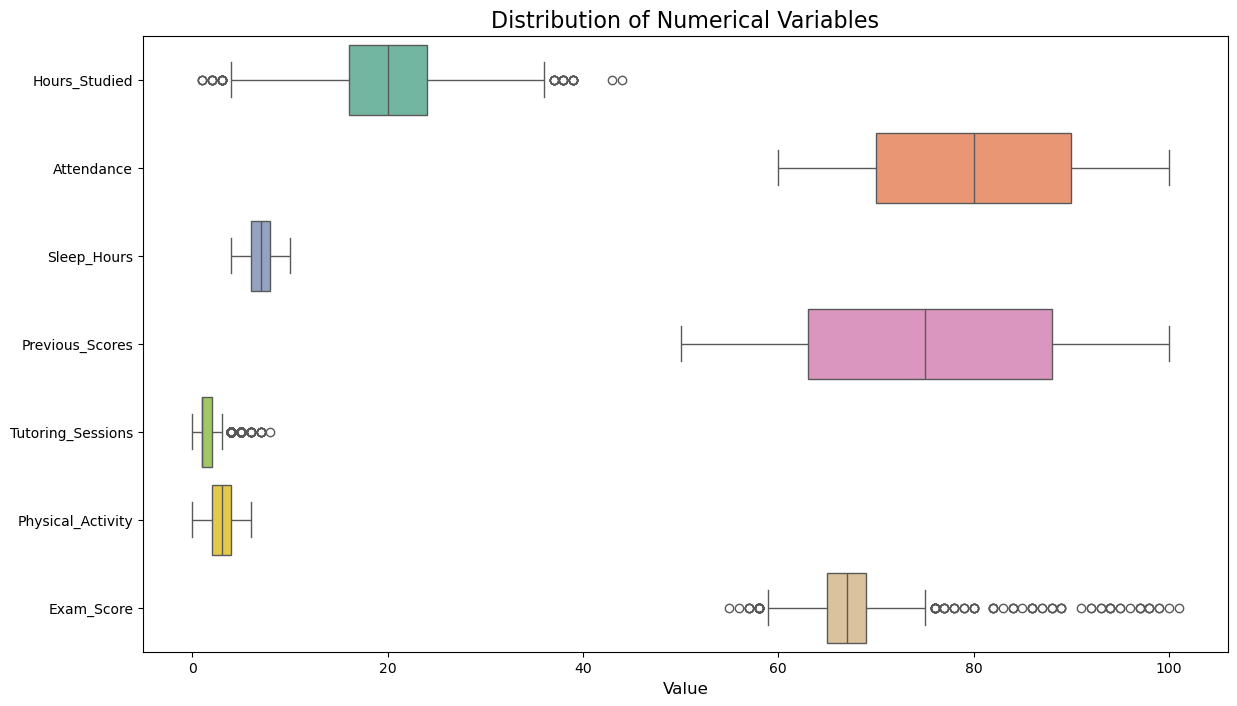

In [ ]:
#Data Distribution Check

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numerical_cols], orient="h", palette="Set2")
plt.title("Distribution of Numerical Variables", fontsize=16)
plt.xlabel("Value", fontsize=12)
plt.show()

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


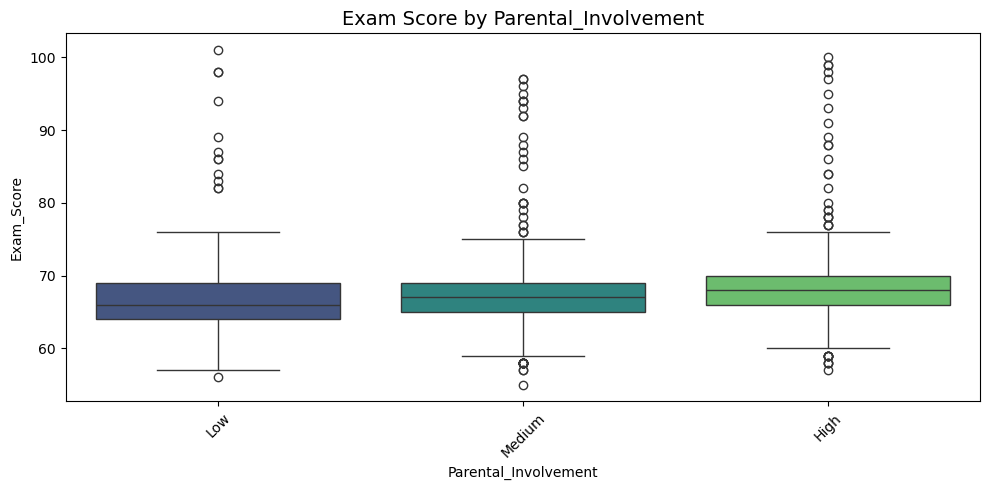

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


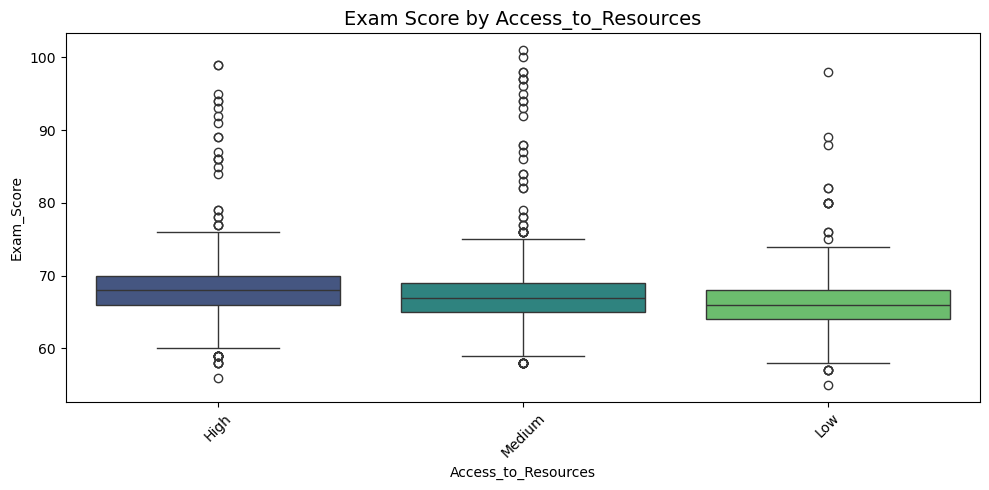

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


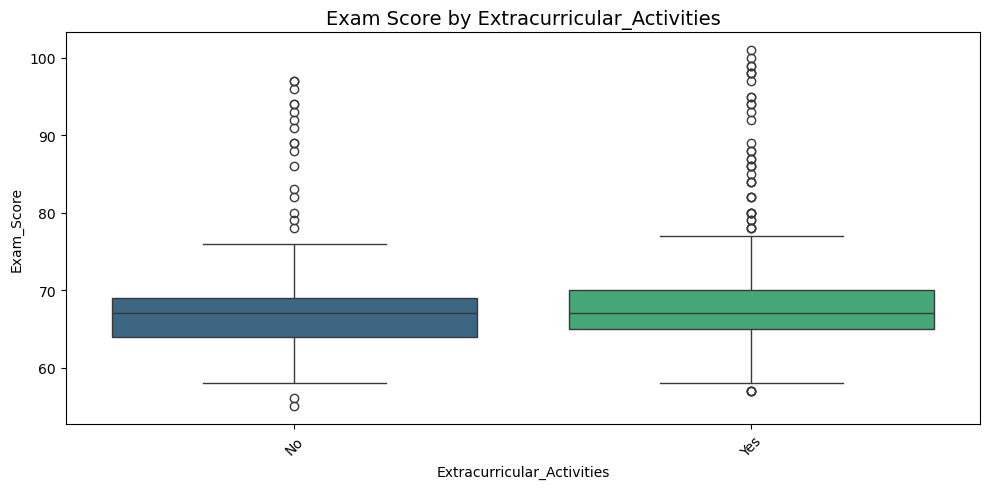

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


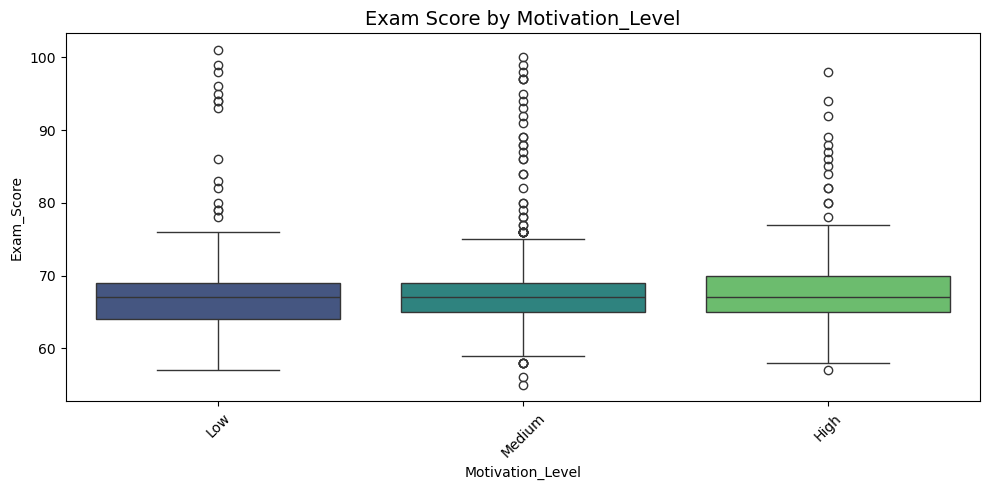

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


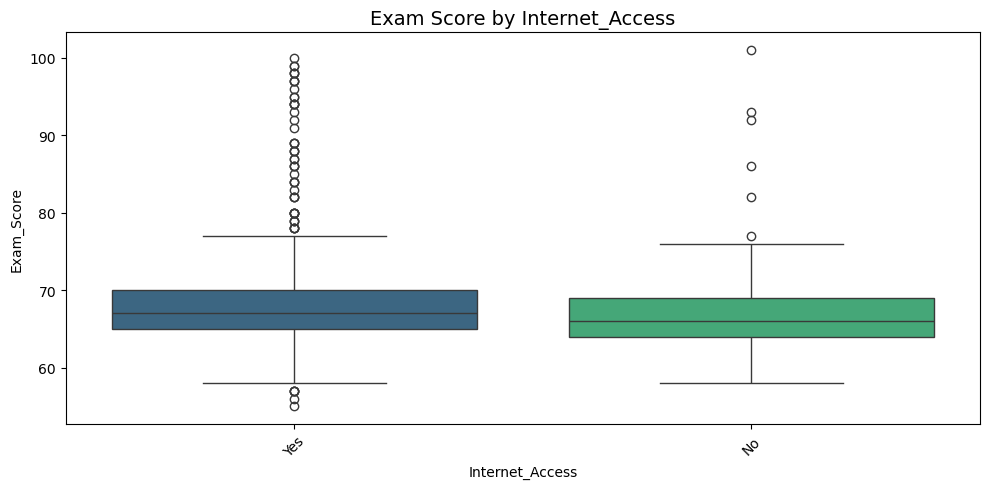

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


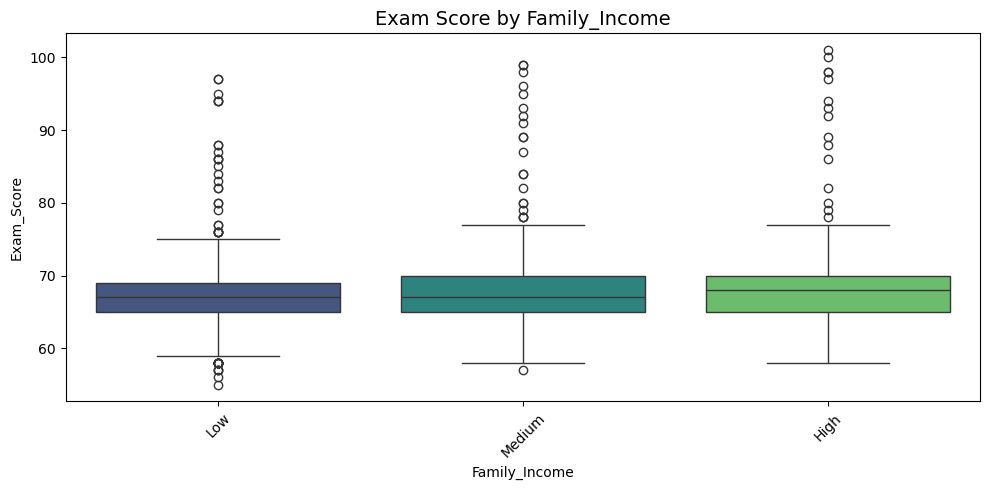

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


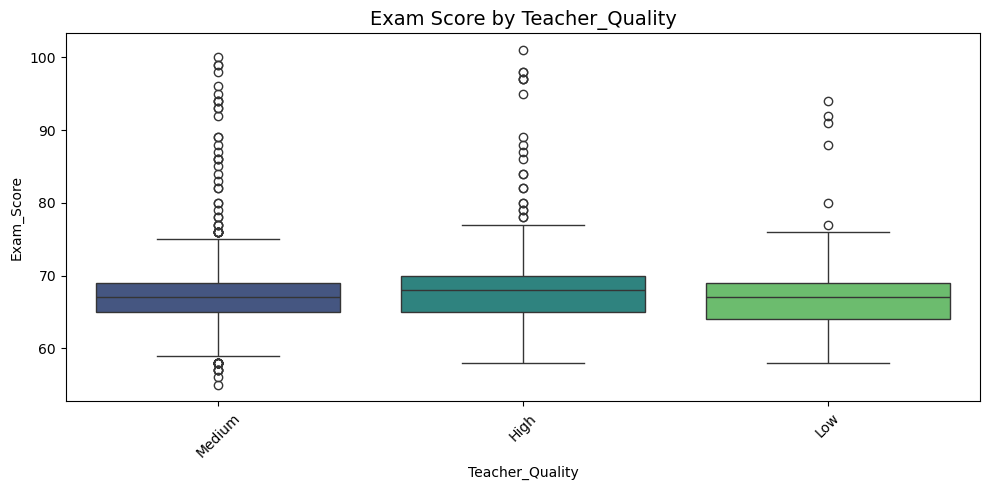

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


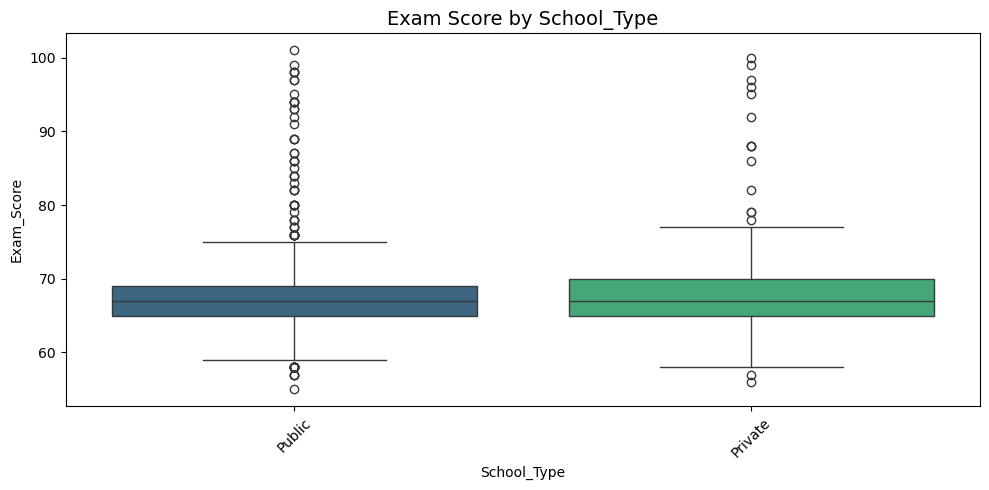

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


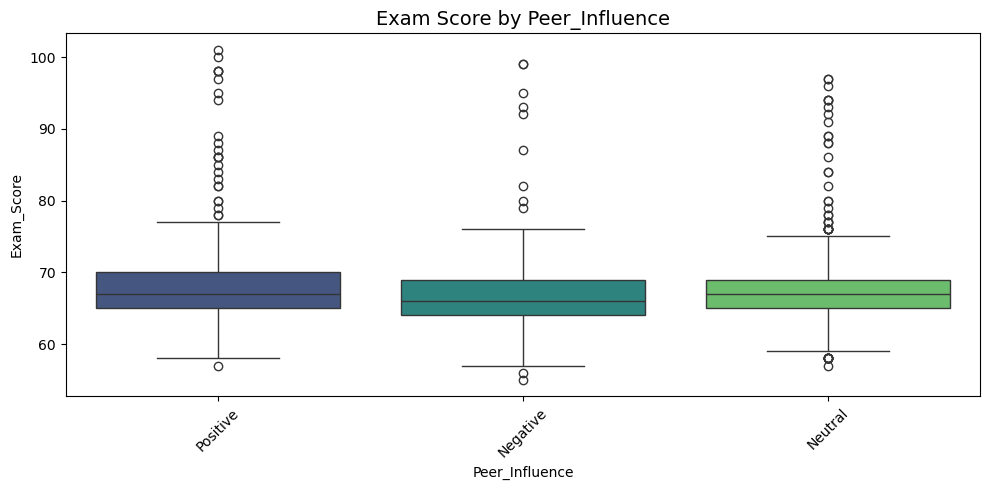

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


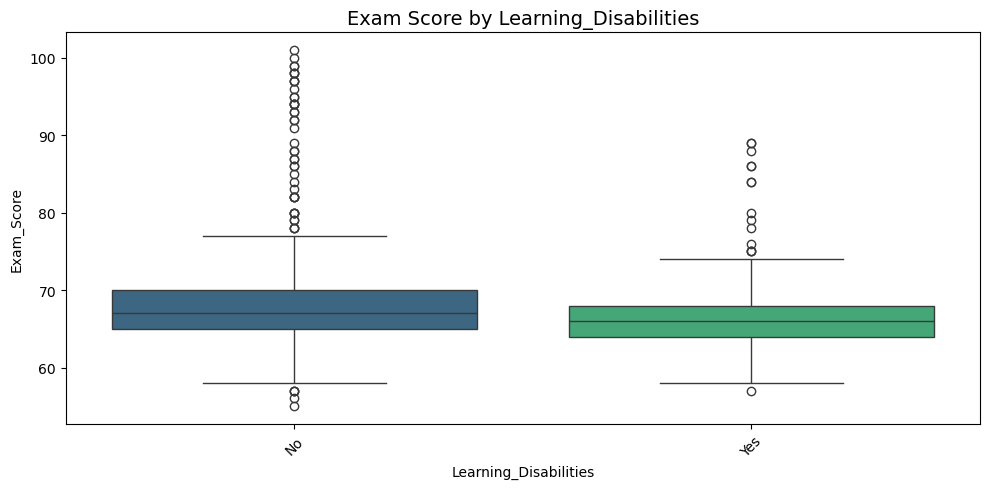

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


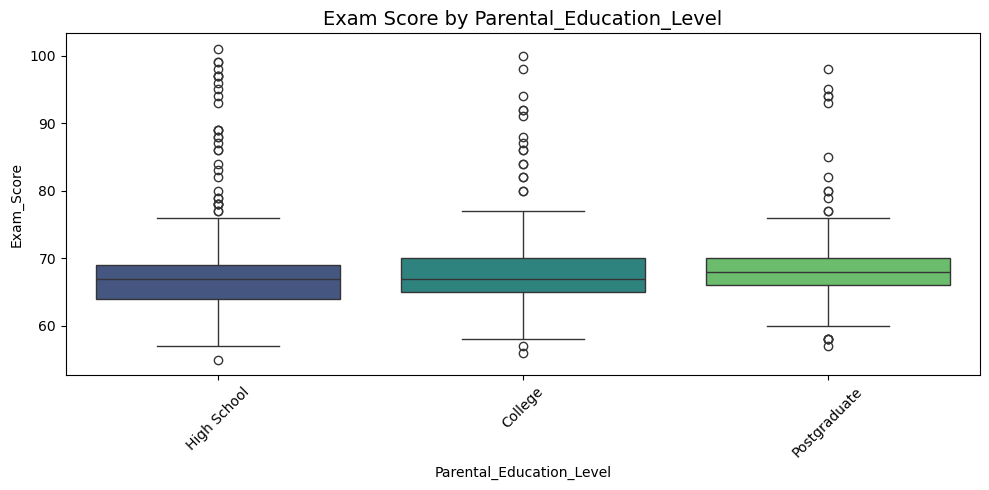

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


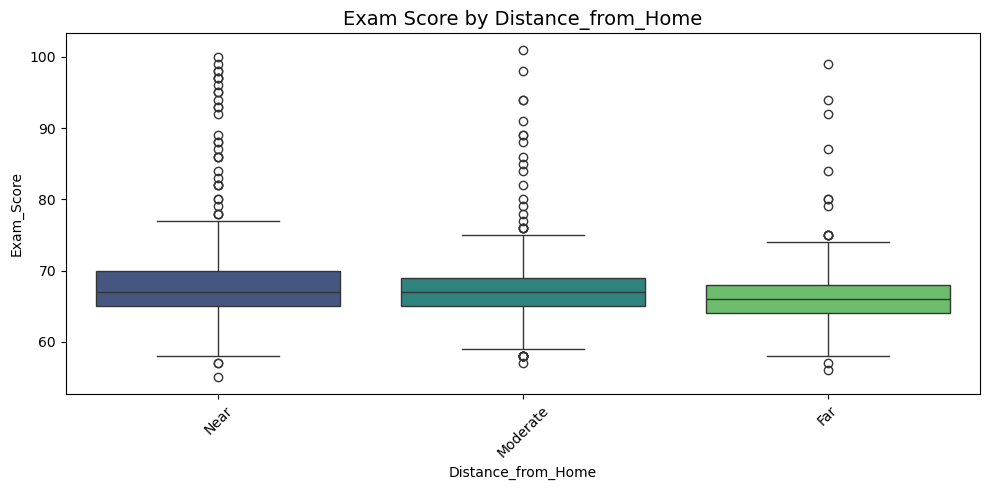

C:\Users\khiny\AppData\Local\Temp\ipykernel_17352\1250311107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")


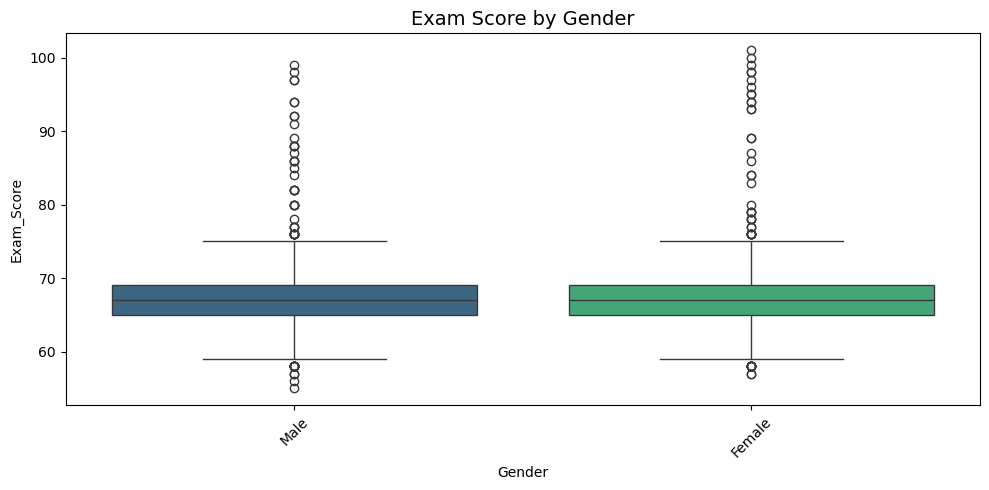

In [ ]:
#data distribution check

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='Exam_Score', palette="viridis")
    plt.title(f"Exam Score by {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['Extracurricular_Activities',
                                 'Internet_Access','School_Type',
                                 'Learning_Disabilities','Gender'])

#df['Parental_Involvement']=LabelEncoder().fit_transform(df['Parental_Involvement'])
#df['Access_to_Resources']=LabelEncoder().fit_transform(df['Access_to_Resources'])
#df['Motivation_Level']=LabelEncoder().fit_transform(df['Motivation_Level'])
#df['Family_Income']=LabelEncoder().fit_transform(df['Family_Income'])
#df['Teacher_Quality']=LabelEncoder().fit_transform(df['Teacher_Quality'])
#df['Peer_Influence']=LabelEncoder().fit_transform(df['Peer_Influence'])
#df['Parental_Education_Level']=LabelEncoder().fit_transform(df['Parental_Education_Level'])
#df['Distance_from_Home']=LabelEncoder().fit_transform(df['Distance_from_Home'])

columns_to_encode = [
    'Parental_Involvement',
    'Access_to_Resources',
    'Motivation_Level',
    'Family_Income',
    'Teacher_Quality',
    'Peer_Influence',
    'Parental_Education_Level',
    'Distance_from_Home'
]


# Apply encoding in a loop
for col in columns_to_encode:
    df[col] = LabelEncoder().fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6607 non-null   int64
 1   Attendance                      6607 non-null   int64
 2   Parental_Involvement            6607 non-null   int32
 3   Access_to_Resources             6607 non-null   int32
 4   Sleep_Hours                     6607 non-null   int64
 5   Previous_Scores                 6607 non-null   int64
 6   Motivation_Level                6607 non-null   int32
 7   Tutoring_Sessions               6607 non-null   int64
 8   Family_Income                   6607 non-null   int32
 9   Teacher_Quality                 6607 non-null   int32
 10  Peer_Influence                  6607 non-null   int32
 11  Physical_Activity               6607 non-null   int64
 12  Parental_Education_Level        6607 non-null   int32
 13  Dis

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_No,Internet_Access_Yes,School_Type_Private,School_Type_Public,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,...,True,False,False,True,False,True,True,False,False,True
1,19,64,1,2,8,59,1,2,2,2,...,True,False,False,True,False,True,True,False,True,False
2,24,98,2,2,7,91,2,2,2,2,...,False,True,False,True,False,True,True,False,False,True
3,29,89,1,2,8,98,2,1,2,2,...,False,True,False,True,False,True,True,False,False,True
4,19,92,2,2,6,65,2,3,2,0,...,False,True,False,True,False,True,True,False,True,False


In [ ]:
#sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
#plt.suptitle("Pair Plot of All Numerical Features", y=1.02)
#plt.show()


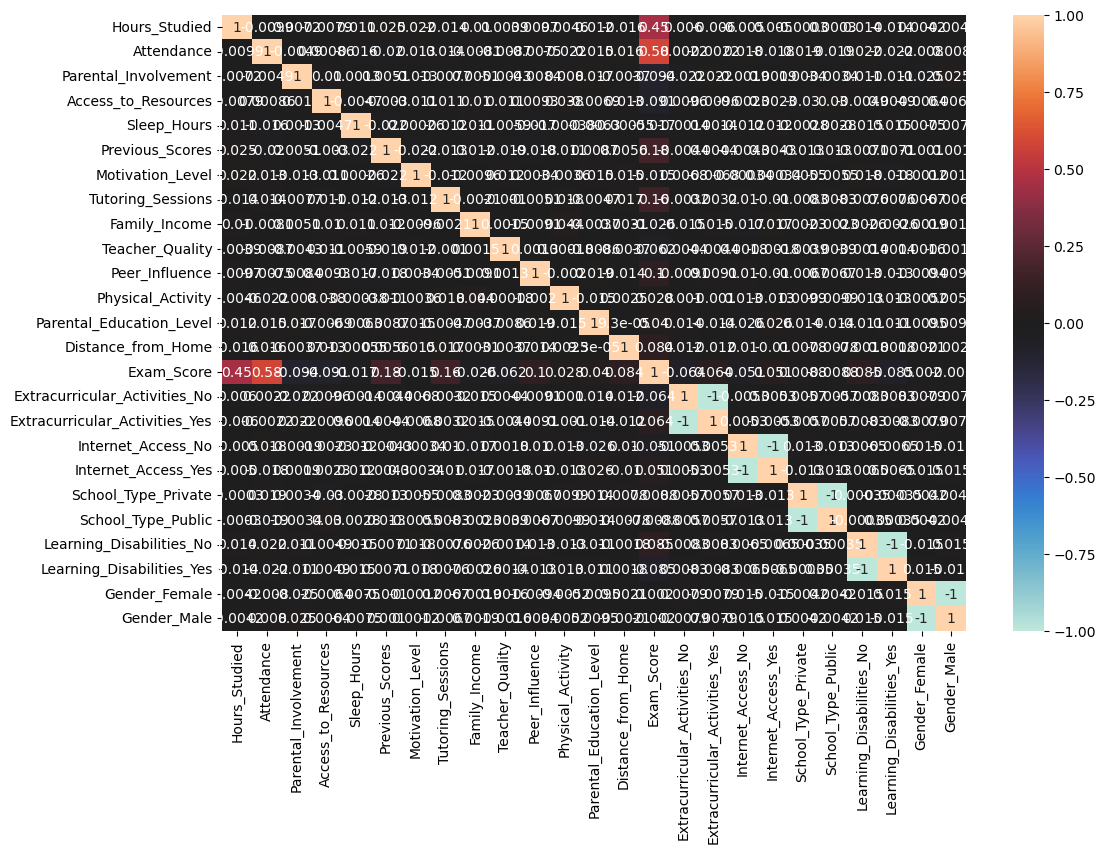

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize =(12,8))
sns.heatmap(corr_matrix, annot=True,center=0)
plt.show()

In [ ]:
exam_corr = corr_matrix[['Exam_Score']].sort_values(
    by='Exam_Score',
    key=abs,
    ascending=False
)
print(exam_corr)

                                Exam_Score
Exam_Score                        1.000000
Attendance                        0.581072
Hours_Studied                     0.445455
Previous_Scores                   0.175079
Tutoring_Sessions                 0.156525
Peer_Influence                    0.100217
Parental_Involvement             -0.094289
Access_to_Resources              -0.090503
Learning_Disabilities_Yes        -0.085066
Learning_Disabilities_No          0.085066
Distance_from_Home                0.083944
Extracurricular_Activities_No    -0.064382
Extracurricular_Activities_Yes    0.064382
Teacher_Quality                  -0.061772
Internet_Access_Yes               0.051475
Internet_Access_No               -0.051475
Parental_Education_Level          0.040381
Physical_Activity                 0.027824
Family_Income                    -0.026484
Sleep_Hours                      -0.017022
Motivation_Level                 -0.014910
School_Type_Public               -0.008844
School_Type

In [ ]:
#                                Exam_Score
#Exam_Score                        1.000000
#Attendance                        0.581072
#Hours_Studied                     0.445455
#Previous_Scores                   0.175079
#Tutoring_Sessions                 0.156525
#Peer_Influence                    0.100217
#Parental_Involvement             -0.094289
#Access_to_Resources              -0.090503
#Learning_Disabilities_Yes        -0.085066
#Learning_Disabilities_No          0.085066
#Distance_from_Home                0.083944

# Regression

In [ ]:
df_final = df[['Exam_Score','Attendance','Hours_Studied','Previous_Scores','Tutoring_Sessions','Peer_Influence','Parental_Involvement','Access_to_Resources','Learning_Disabilities_Yes','Learning_Disabilities_No','Distance_from_Home']]
df_final.head()

,Exam_Score,Attendance,Hours_Studied,Previous_Scores,Tutoring_Sessions,Peer_Influence,Parental_Involvement,Access_to_Resources,Learning_Disabilities_Yes,Learning_Disabilities_No,Distance_from_Home
0,67,84,23,73,0,2,1,0,False,True,2
1,61,64,19,59,2,0,1,2,False,True,1
2,74,98,24,91,2,1,2,2,False,True,2
3,71,89,29,98,1,0,1,2,False,True,1
4,70,92,19,65,3,1,2,2,False,True,2


In [ ]:
X = df_final.drop(columns='Exam_Score')
y = df_final['Exam_Score']
print(X.shape,y.shape)

(6607, 10) (6607,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape)

(4624, 10) (1983, 10)


In [ ]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)
#print(X_train_scaled,X_test_scaled)



In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
#print(lr.coef_, lr.intercept_)

y_predict = lr.predict(X_test_scaled)
#print(y_predict.shape,y_test.shape)
print(y_predict)


[65.22277557 66.94678026 69.32389408 ... 70.05430183 69.49495796
 66.42273316]


In [ ]:

rscore = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
print("Linear Regression")
print(f'r2 score:  {rscore} mse: {mse} mae: {mae}')
print("//////////")

Linear Regression
r2 score:  0.6789849139140318 mse: 4.410738069418369 mae: 1.0909610692460572
//////////


In [ ]:
ls = Lasso(alpha=0.01)
ls.fit(X_train_scaled,y_train)
#print(lr.coef_, lr.intercept_)

y_predict_ls = ls.predict(X_test_scaled)
#print(y_predict.shape,y_test.shape)
print(y_predict_ls)

[65.23726533 66.94324178 69.30680225 ... 70.03651859 69.44445257
 66.39164869]


In [ ]:
rscore_ls = r2_score(y_test,y_predict_ls)
mse_ls = mean_squared_error(y_test,y_predict_ls)
mae_ls = mean_absolute_error(y_test,y_predict_ls)
print("Lasso")
print(f'r2 score:  {rscore_ls} mse: {mse_ls} mae: {mae_ls}')
print("//////////")

Lasso
r2 score:  0.679248136119907 mse: 4.407121403864342 mae: 1.0913063367860618
//////////


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled,y_train)
#print(lr.coef_, lr.intercept_)

y_predict_rf = rf.predict(X_test_scaled)
#print(y_predict.shape,y_test.shape)
print(y_predict_rf)

rscore_rf = r2_score(y_test,y_predict_rf)
mse_rf = mean_squared_error(y_test,y_predict_rf)
mae_rf = mean_absolute_error(y_test,y_predict_rf)
print("Random Forest")
print(f'r2 score:  {rscore_rf} mse: {mse_rf} mae: {mae_rf}')
print("//////////")

[64.22 66.28 69.94 ... 69.99 68.13 65.95]
Random Forest
r2 score:  0.6340155302472619 mse: 5.028616110340673 mae: 1.2115531181711212
//////////


In [ ]:
xg = XGBRegressor(n_estimators=200,ma_depth=1,random_state=42)
xg.fit(X_train_scaled,y_train)
#print(lr.coef_, lr.intercept_)

y_predict_xg = xg.predict(X_test_scaled)
#print(y_predict.shape,y_test.shape)
print(y_predict_xg)

rscore_xg = r2_score(y_test,y_predict_xg)
mse_xg = mean_squared_error(y_test,y_predict_xg)
mae_xg = mean_absolute_error(y_test,y_predict_xg)
print("XGB Regressor")
print(f'r2 score:  {rscore_xg} mse: {mse_xg} mae: {mae_xg}')
print("//////////")

C:\Users\khiny\anaconda3\envs\project1\lib\site-packages\xgboost\core.py:158: UserWarning: [17:21:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "ma_depth" } are not used.

  warnings.warn(smsg, UserWarning)


[63.608746 65.15965  71.109764 ... 70.05406  67.20261  66.663605]
XGB Regressor
r2 score:  0.5826139450073242 mse: 5.7348713874816895 mae: 1.2918907403945923
//////////


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"n_estimators": [50,100, 200], "max_depth": [1,3, 5]}
grid = GridSearchCV(XGBRegressor(), params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 1, 'n_estimators': 200}


In [ ]:
dt = DecisionTreeRegressor(max_depth=5,min_samples_split=2,min_samples_leaf=4,random_state=42)
dt.fit(X_train_scaled,y_train)
#print(lr.coef_, lr.intercept_)

y_predict_dt = dt.predict(X_test_scaled)
#print(y_predict.shape,y_test.shape)
print(y_predict_dt)

rscore_dt = r2_score(y_test,y_predict_dt)
mse_dt = mean_squared_error(y_test,y_predict_dt)
mae_dt = mean_absolute_error(y_test,y_predict_dt)
print("Decision Tree Regressor")
print(f'r2 score:  {rscore_dt} mse: {mse_dt} mae: {mae_dt}')
print("//////////")

[66.38291139 66.27361564 68.91189427 ... 71.12149533 67.
 64.44019139]
Decision Tree Regressor
r2 score:  0.5462658503280409 mse: 6.2342941939411896 mae: 1.6036501161185501
//////////


In [ ]:
import numpy as np
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10,None],
    'min_samples_leaf': [1, 2, 4, None],
    'criterion': ['squared_error', 'friedman_mse'],
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best RMSE: 2.8508534776499457


C:\Users\khiny\anaconda3\envs\project1\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
840 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khiny\anaconda3\envs\project1\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khiny\anaconda3\envs\project1\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\khiny\anaconda3\envs\project1\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_cons

In [ ]:
# models = {
#     'Linear Regression' : LinearRegression(),
#     'Lasso' : Lasso(alpha=0.01),
#     'Random Forest' : RandomForestRegressor(random_state=42),
#     'XGBoost' : XGBRegressor(random_state=42)
# }

# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import cross_val_score
# import numpy as np

# results = {}
# for name,model in models.items():
#     scores = cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error')
#     results[name]={"r2": scores.mean()if "r2" in str(scores)else None,"Mean RMSE": np.sqrt(-scores.mean()),"Std RMSE":np.sqrt(scores.std())}
# results_df = pd.DataFrame(results).T.sort_values('Mean RMSE')
# print(results_df)